# Ford Go Bike

## 1. Gather Data

In [1]:
import glob, os
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from IPython.core.display import Image, display
from mpl_toolkits.basemap import Basemap

%matplotlib inline


In [2]:
from PIL import Image

In [3]:
# import downloaded csv files
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/*.csv"))), sort=True)

In [4]:
df.shape

(3015214, 16)

In [5]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [6]:
df['end_station_latitude'].head()

0    37.764478
1    37.788300
2    37.795392
3    37.795392
4    37.322980
Name: end_station_latitude, dtype: float64

In [7]:
df['end_station_longitude'].head()

0   -122.402570
1   -122.408531
2   -122.394203
3   -122.394203
4   -121.887931
Name: end_station_longitude, dtype: float64

In [11]:
df_short = df[:100]
df_short.shape

(100, 16)

In [14]:
# Extract the data we're interested in
lat = df_short['end_station_latitude'].values
lon = df_short['end_station_longitude'].values
population = df_short['duration_sec'].values
#area = cities['area_total_km2'].values


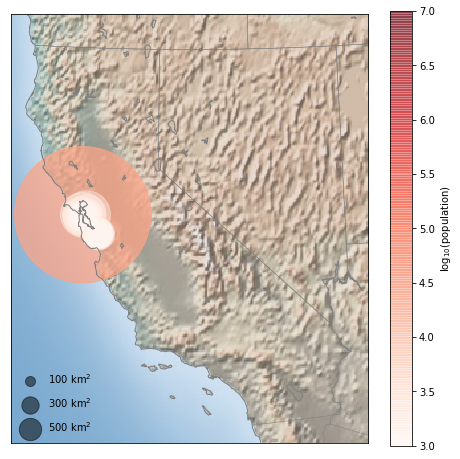

In [16]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=population,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');